# Course Information
DDS8555 - Predictive Analysis<br>
Assignment 4<br>
Implement Linear Regression using the Abalone Dataset from Kaggle.com.

By - Samuel Mbah Nde
Due Date and Time: Sunday February 16th 2025 at 11:59PM PST.

# Conceptual Questions

This file contains solutions to the conceptual questions from ISLP python that are part of this week's assignments. There are 2 questions, Conceptual question 3 and question 8. In this notebook, I begin each question with a screenshot of itself and then present the solution.no | 

## Import the packages needed analyze data.
I will load all the packages needed in one place to keep my code organized.

In [103]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import probplot
import re, os, json, requests, random
from datetime import datetime, timedelta, timezone
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
from sklearn import datasets
from ISLP import load_data
from ISLP.models import (summarize,
                         poly,
                         ModelSpec as MS)
from functools import partial
from statsmodels.gam.api import BSplines
from statsmodels.stats.anova import anova_lm

## Set seed to ensure work is reproducible.

In [6]:
random.seed(6222)

## Conceptual Question 3

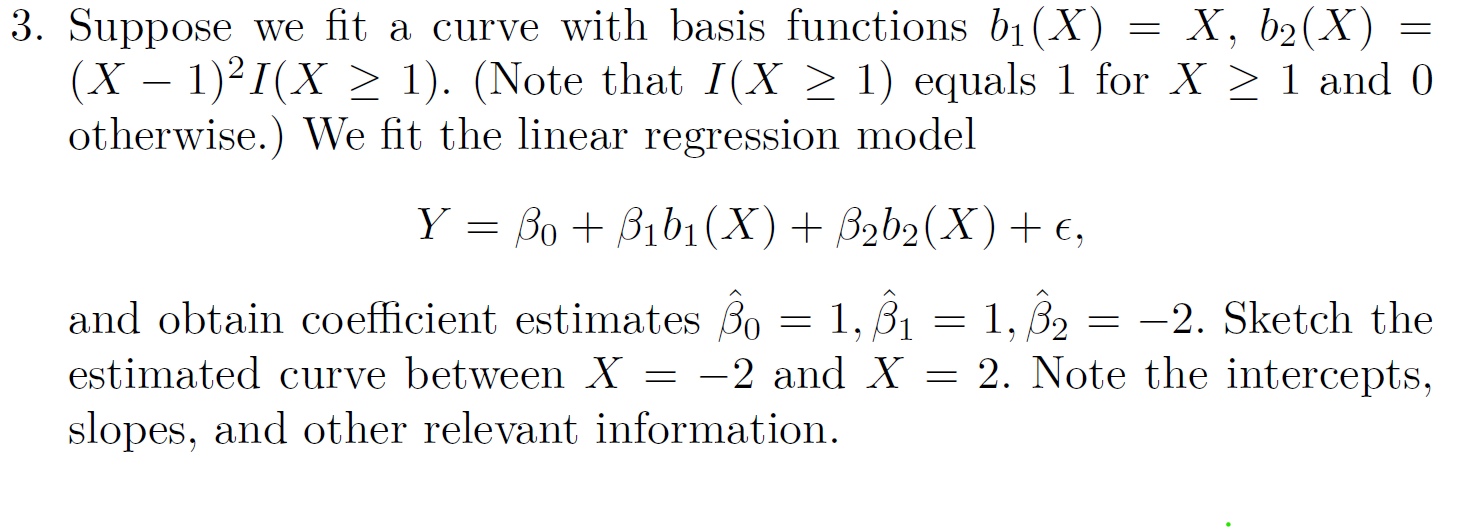

In [27]:
-2*(1.25**2) + 5 *1.25 -1

2.125

In [29]:
estimated_curve(1.25)

2.125

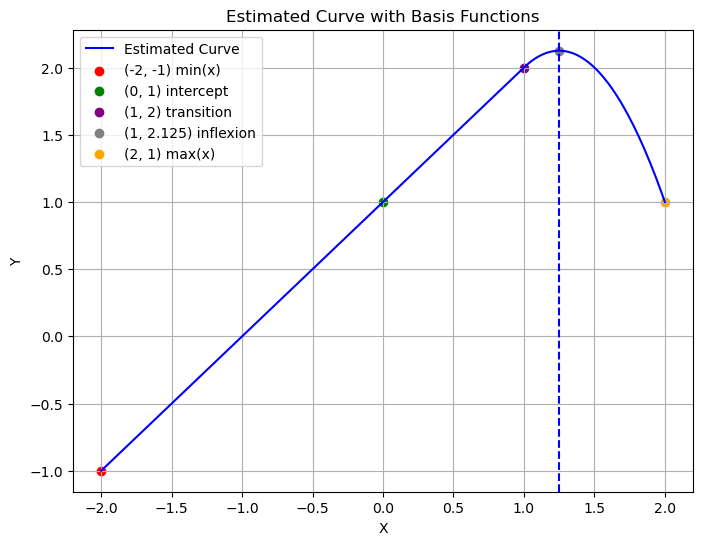

Equation for X < 1:
Y = 1 + 1*X + (-2)*0 = 1 + X
Equation for X >= 1:
Y = 1 + 1*X + (-2)*(X-1)^2 = -2X^2 + 5X - 1


In [39]:
# Define the basis functions
def b1(X):
  return X

def b2(X):
  return (X - 1)**2 * (X >= 1)

# Define the estimated coefficients
beta0_hat = 1
beta1_hat = 1
beta2_hat = -2

# Define the estimated curve function
def estimated_curve(X):
  return beta0_hat + beta1_hat * b1(X) + beta2_hat * b2(X)

# Generate points for plotting
X_range = np.linspace(-2, 2, 200)  # Generates 200 points between -2 and 2
Y_estimated = estimated_curve(X_range)

# Plot the estimated curve
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
plt.plot(X_range, Y_estimated, label="Estimated Curve", color = 'blue')

# Add labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimated Curve with Basis Functions")

# Add grid for better readability
plt.grid(True)

# Highlight important points (intercepts, slopes)
# X = -2
plt.scatter(-2, estimated_curve(-2), color='red', label=f"(-2, {estimated_curve(-2)}) min(x)")
# X = 0
plt.scatter(0, estimated_curve(0), color='green', label=f"(0, {estimated_curve(0)}) intercept")
# X = 1
plt.scatter(1, estimated_curve(1), color='purple', label=f"(1, {estimated_curve(1)}) transition")
# X = 1.25
plt.scatter(1.25, estimated_curve(1.25), color='gray', label=f"(1, {estimated_curve(1.25)}) inflexion")
# X = 2
plt.scatter(2, estimated_curve(2), color='orange', label=f"(2, {estimated_curve(2)}) max(x)")

plt.axvline(x=1.25, color = 'blue', linestyle='--')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Print the equations for different intervals for clarity
print("Equation for X < 1:")
print("Y = 1 + 1*X + (-2)*0 = 1 + X")
print("Equation for X >= 1:")
print("Y = 1 + 1*X + (-2)*(X-1)^2 = -2X^2 + 5X - 1")

## Conceptual Question 8

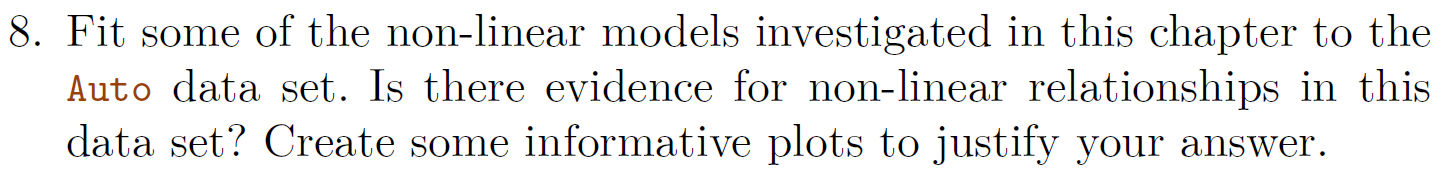

# Investigating Non-Linearity in the Auto Dataset

## Introduction
In this analysis, we explore potential non-linear relationships in the **Auto** dataset using methods discussed in Chapter 7 of *ISLP (Introduction to Statistical Learning with Python)*. We specifically apply polynomial regression and splines to assess whether a linear model is sufficient or if non-linear relationships exist.

## Dataset Overview
The **Auto** dataset contains various attributes related to automobiles, including **horsepower**, **weight**, **displacement**, and **acceleration**, which are potential predictors of **mpg** (miles per gallon). Our goal is to determine whether **mpg** has non-linear relationships with these predictors.

## Loading and Inspecting the Data


In [47]:
# Load the Auto dataset
auto = load_data('Auto')

# Display basic dataset information
display(auto.head())
auto.info()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


In [49]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


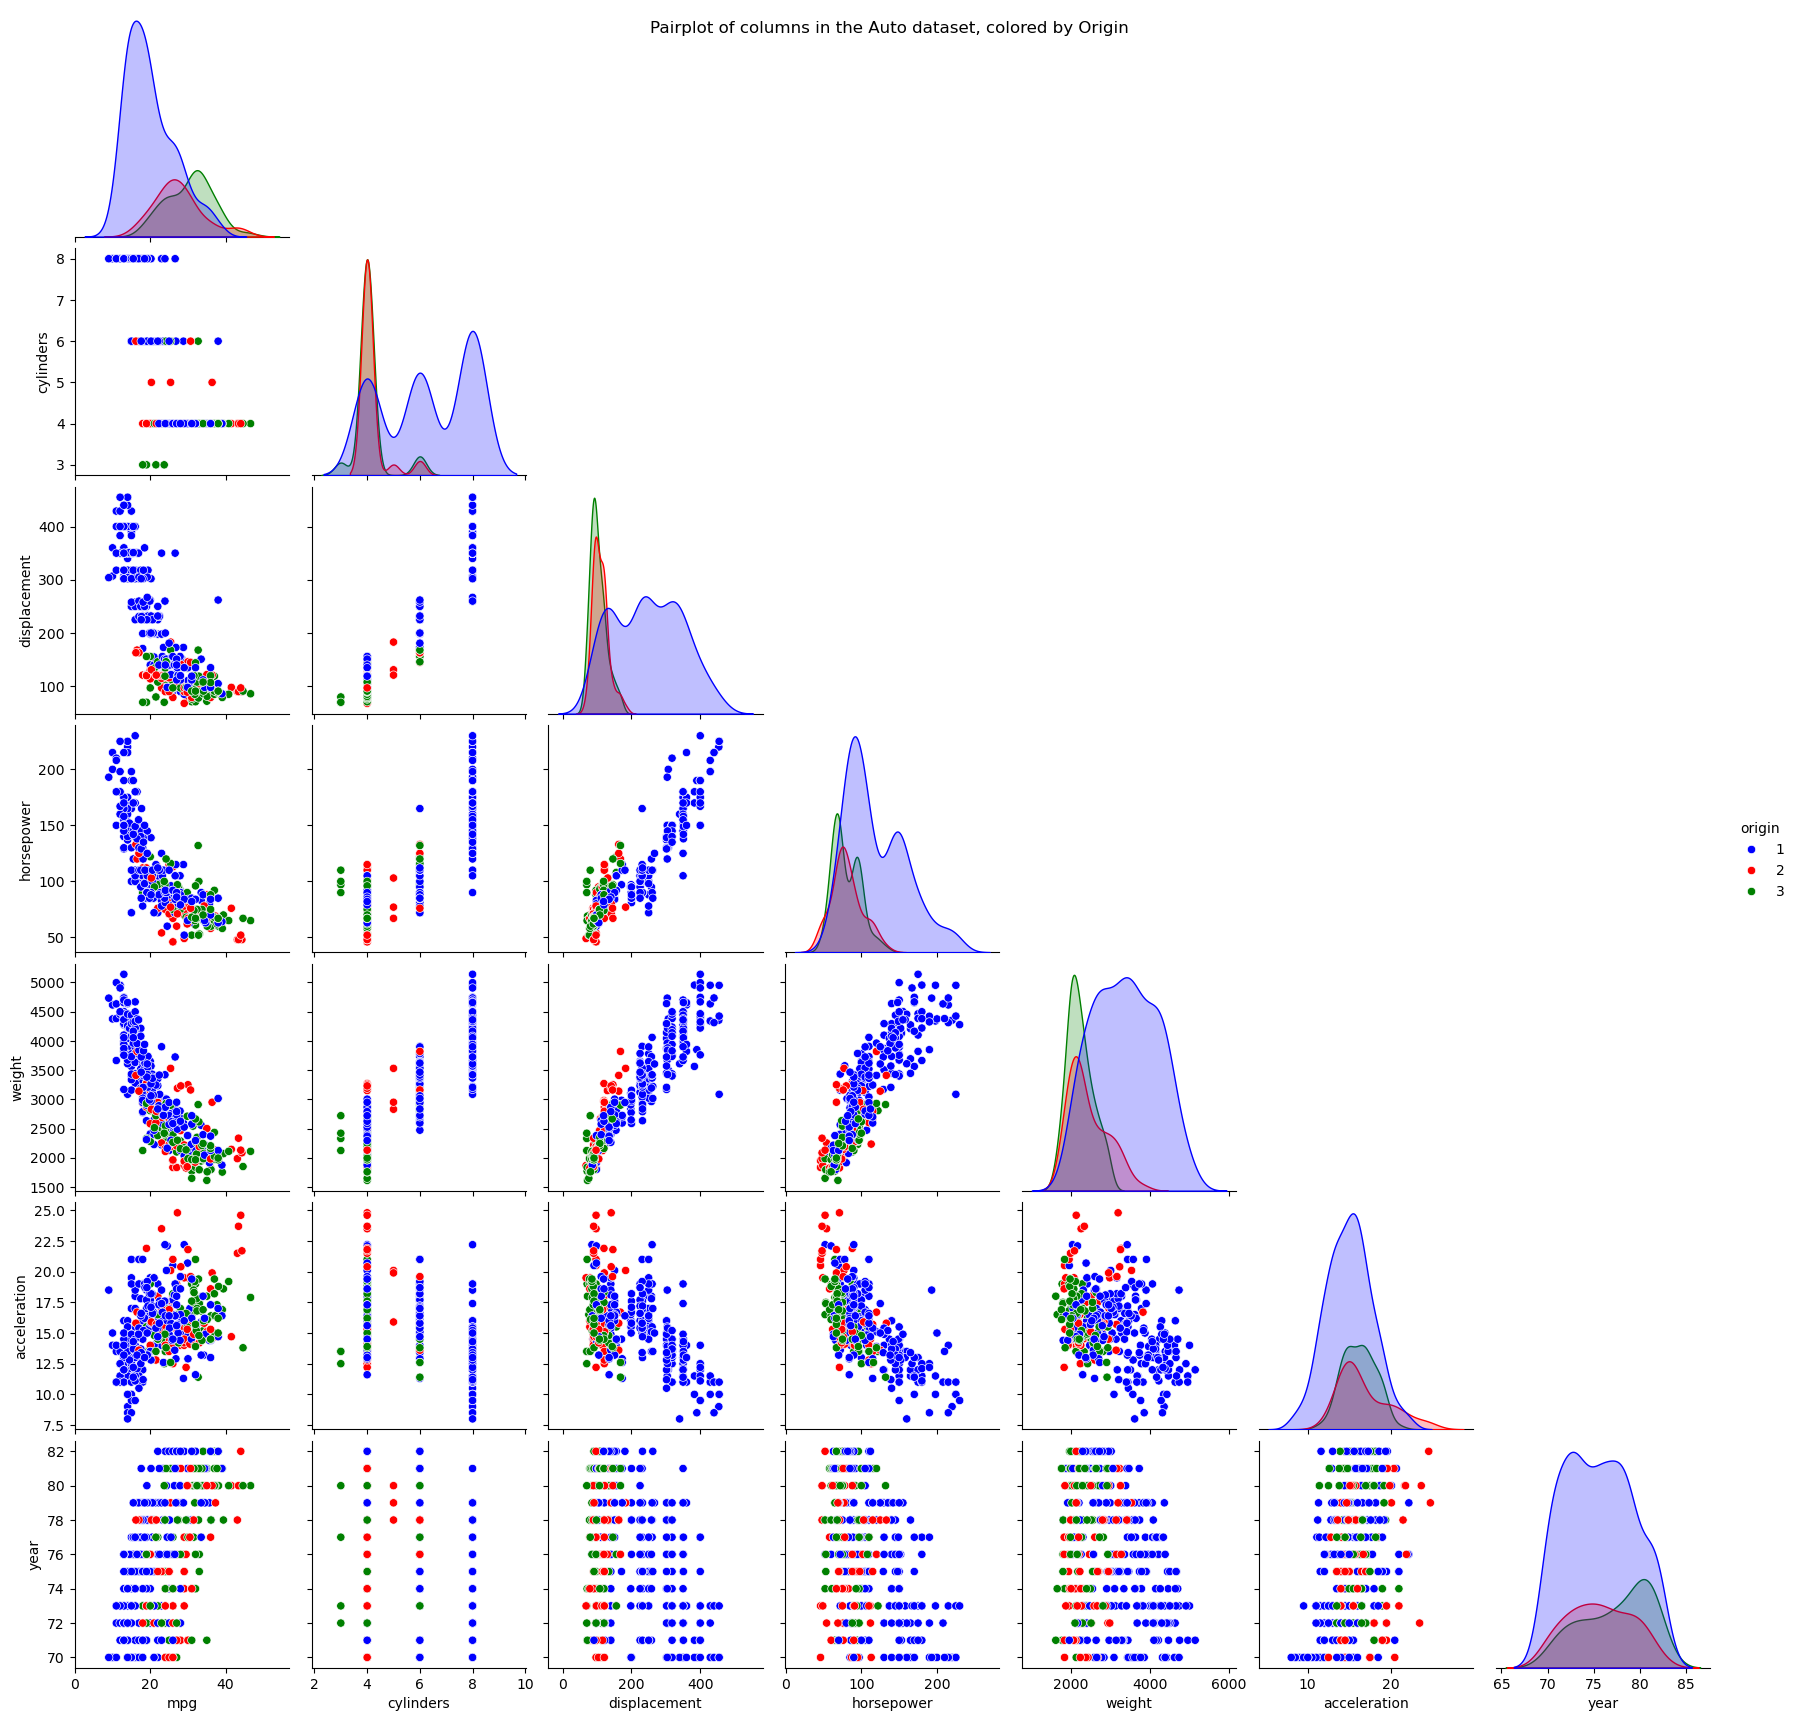

In [71]:
colors = [
    "blue",
    "red",
    "green",
    "gray",
    "orange",
    "purple",
    "brown",
    "pink",
    "cyan",
    "magenta"
]

g = sns.pairplot(auto, corner=True, diag_kind='kde', hue='origin', palette=colors[:auto.origin.nunique()])
# Set the title of the plot
g.fig.suptitle("Pairplot of columns in the Auto dataset, colored by Origin")
plt.show()

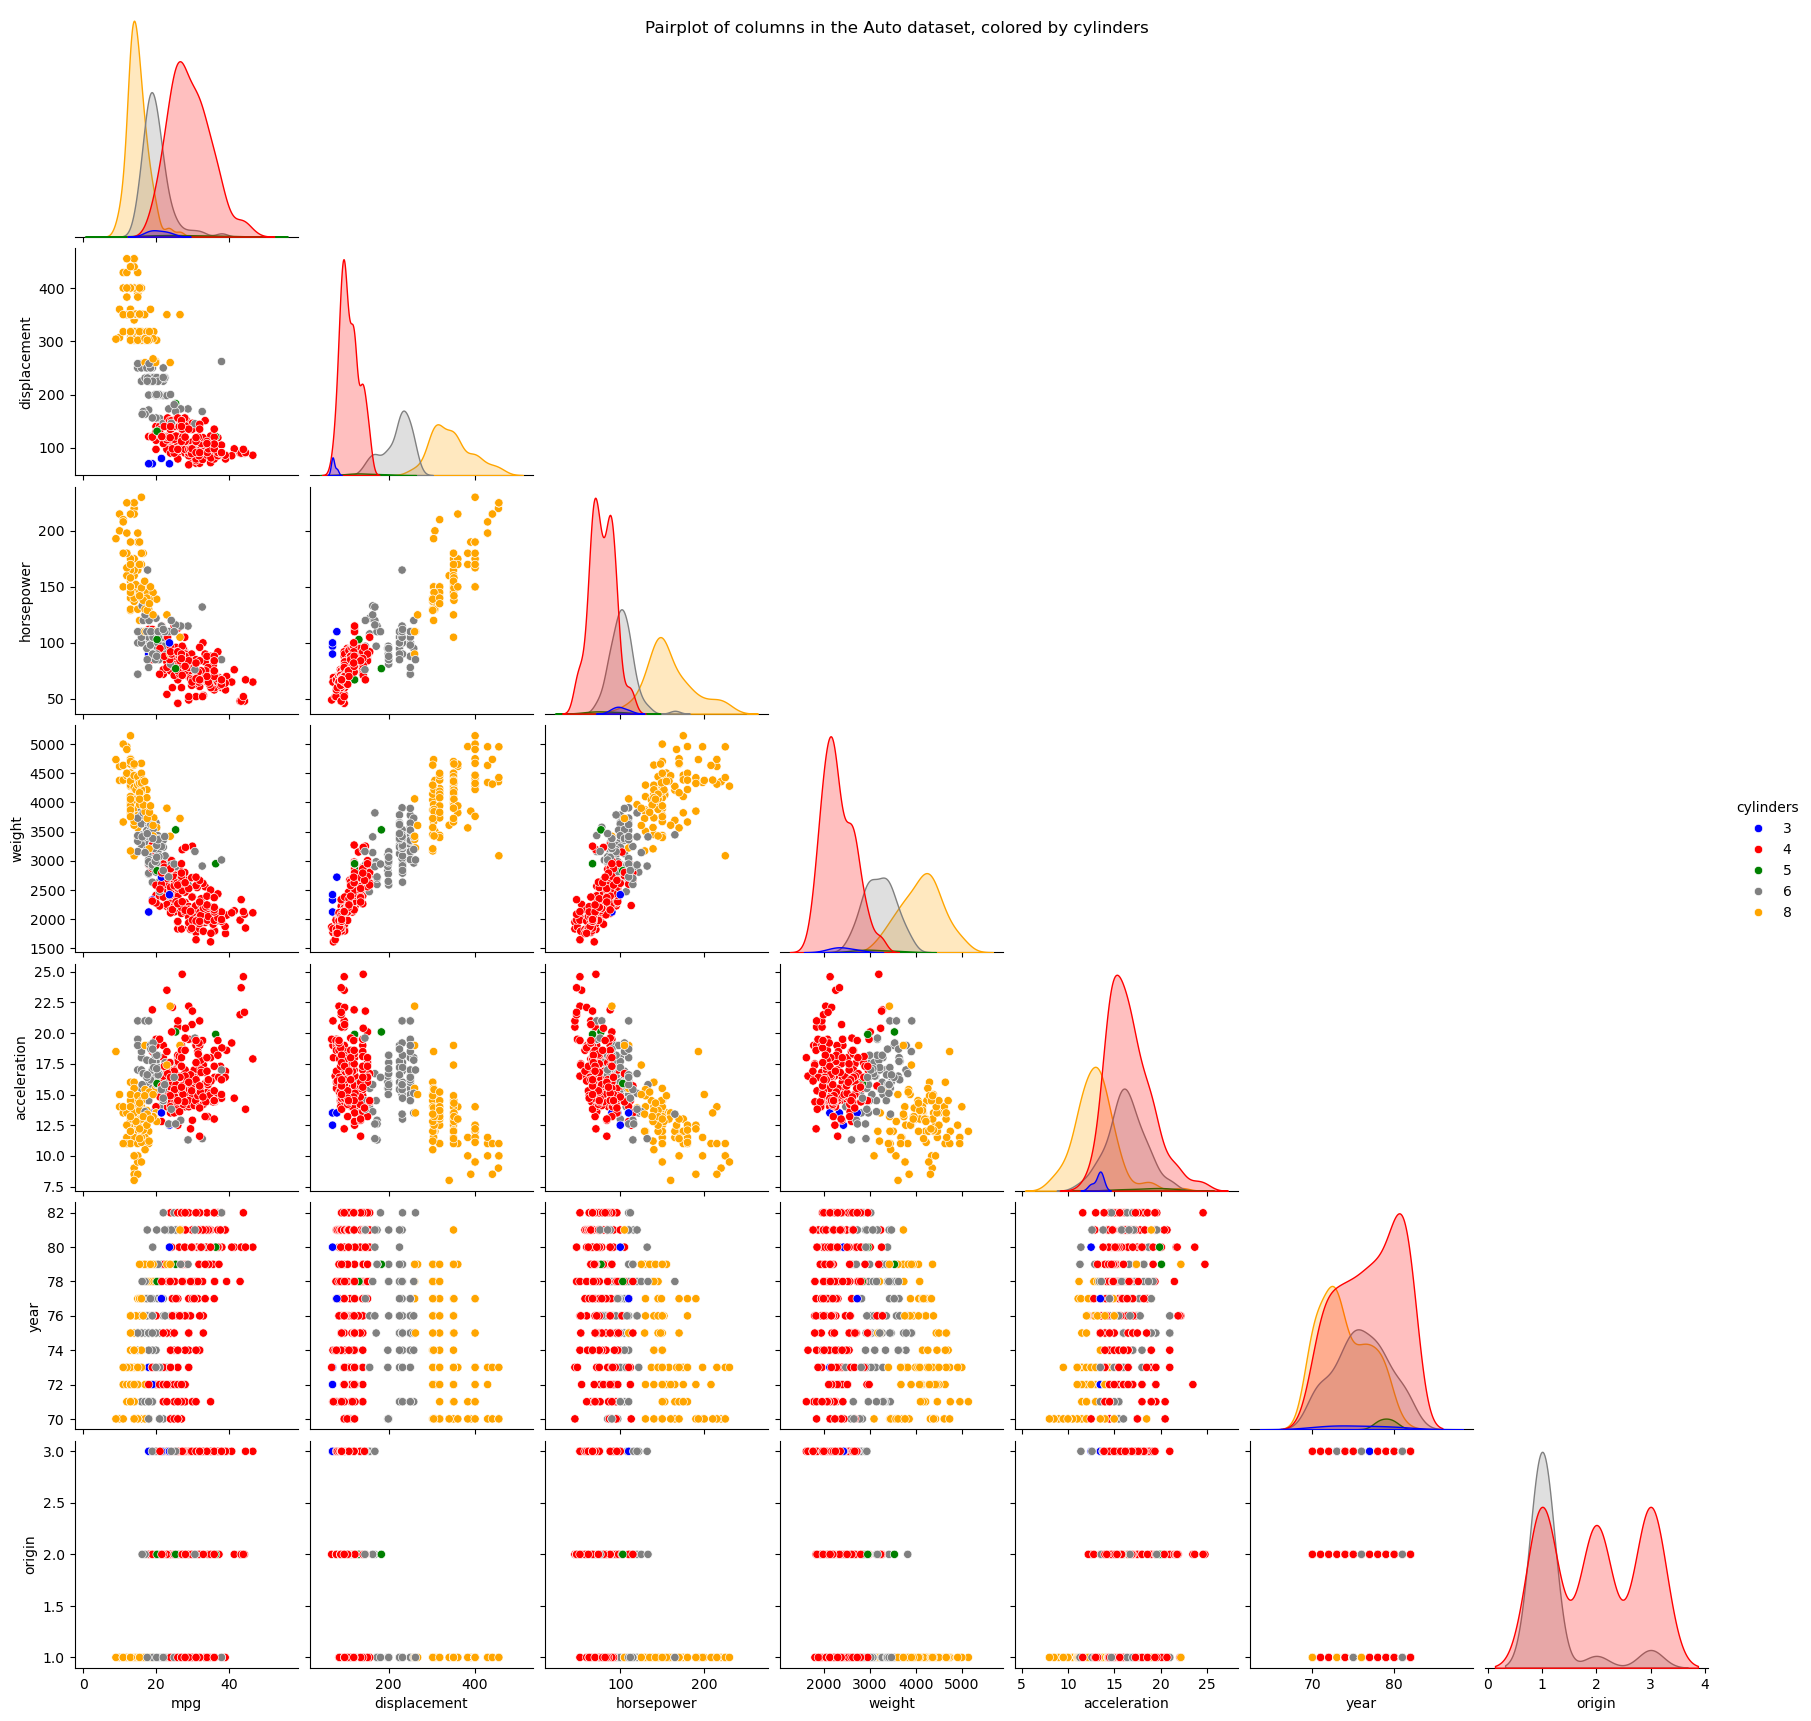

In [75]:
g = sns.pairplot(auto, corner=True, diag_kind='kde', hue='cylinders', palette=colors[:auto.cylinders.nunique()])
# Set the title of the plot
g.fig.suptitle("Pairplot of columns in the Auto dataset, colored by cylinders")
plt.show()

In [73]:
auto.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [85]:
auto['origin_cylinders'] = auto.apply(lambda x: f"{int(x['cylinders'])}_{int(x['origin'])}", axis = 1)

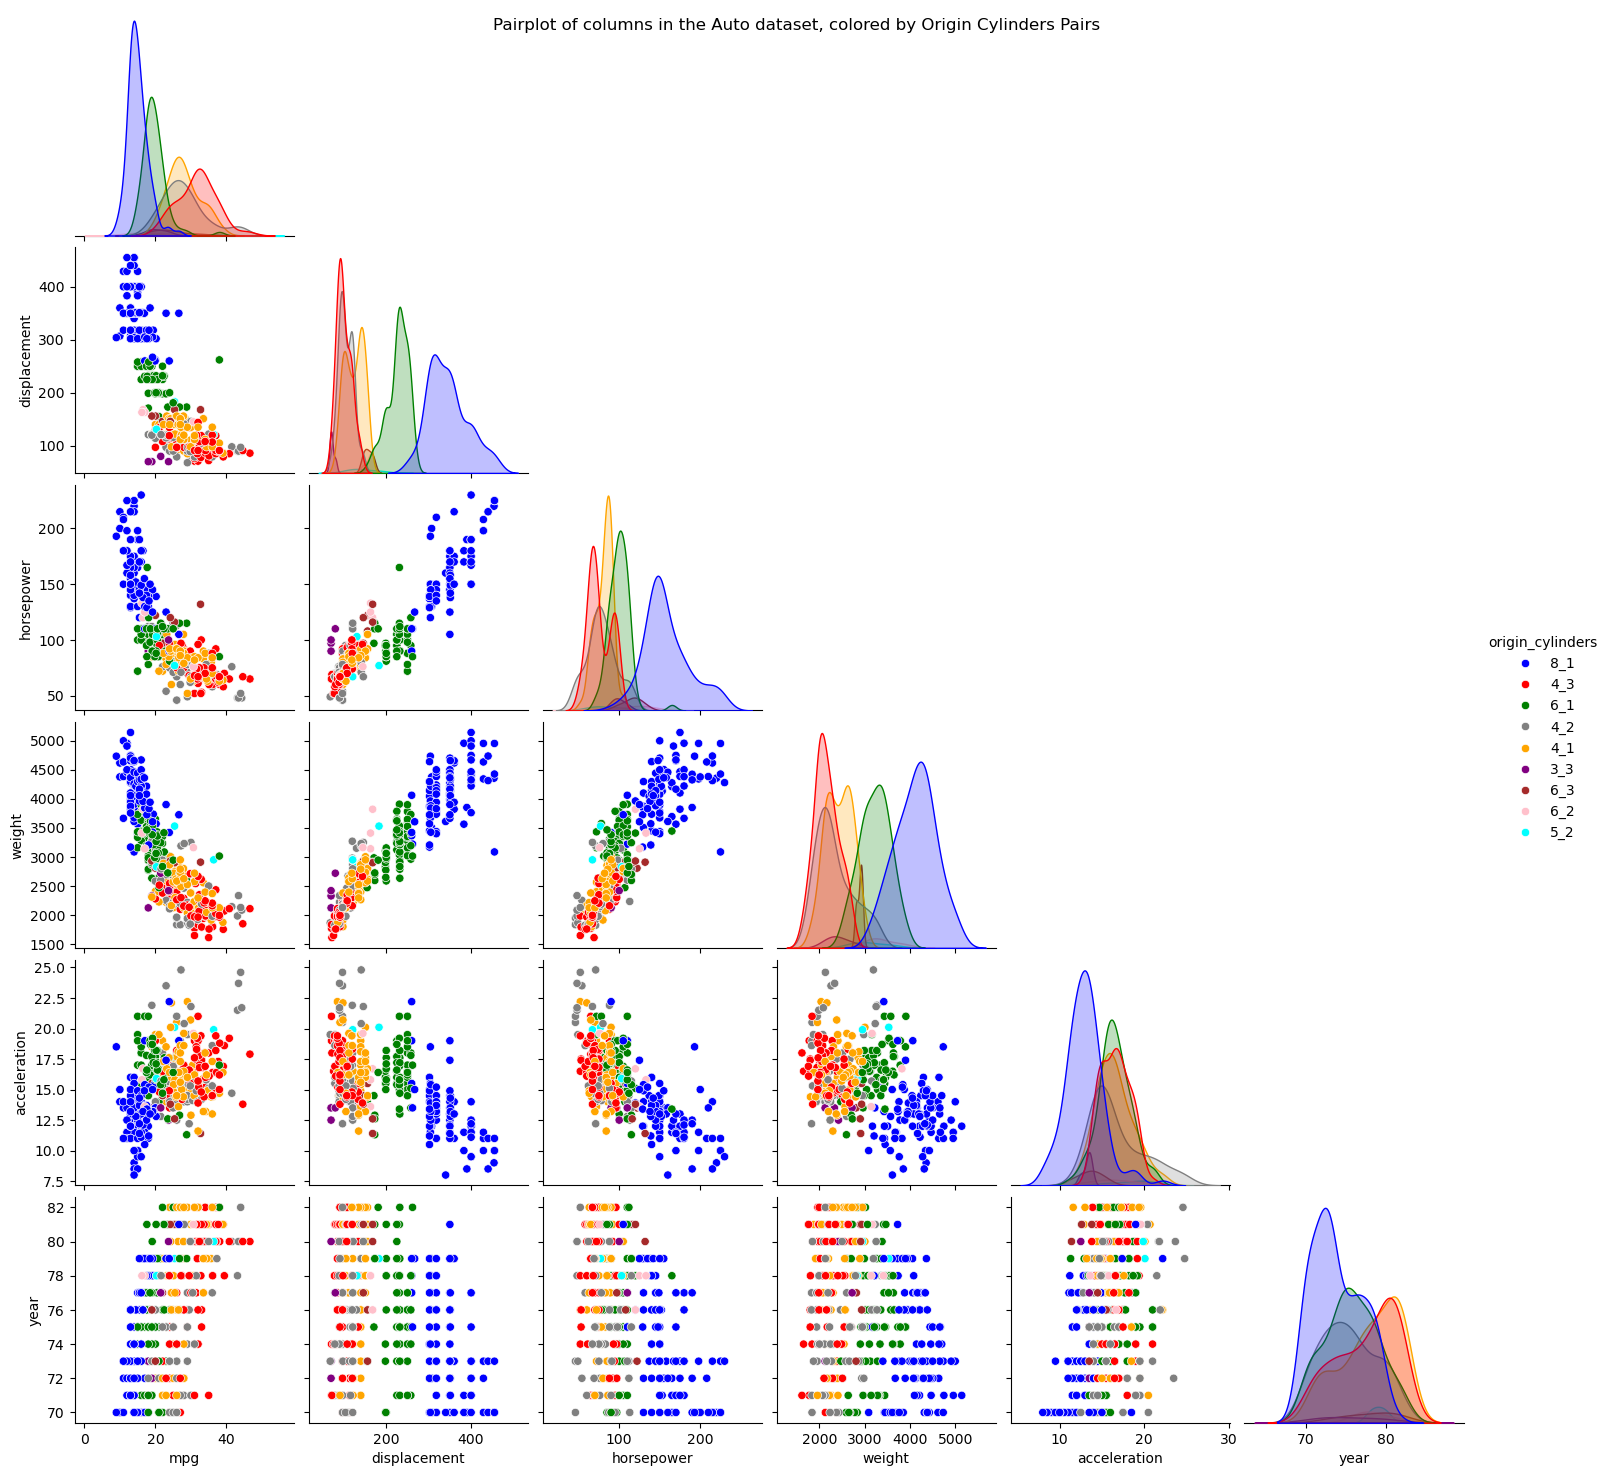

In [146]:
g = sns.pairplot(auto.drop(columns = ['cylinders', 'origin']), corner=True, diag_kind='kde', hue='origin_cylinders', palette=colors[:auto.origin_cylinders.nunique()])
# Set the title of the plot
g.fig.suptitle("Pairplot of columns in the Auto dataset, colored by Origin Cylinders Pairs")
plt.show()

## Polynomial Regression

From the pairplots, we see curve-like trends which look more like polynomials in the relationship between MPG and a lot of the features such as horsepower. We fit polynomial regression models to check for non-linearity. We start by fitting a polynomial model for **mpg ~ horsepower**.

In [ ]:
pd.qcut(auto.horsepower.values, )

In [134]:
def plot_mpg_fit(age_df, 
                  basis,
                  title):

    X = basis.transform(auto)
    Xnew = basis.transform(age_df)
    M = sm.OLS(y, X).fit()
    preds = M.get_prediction(Xnew)
    bands = preds.conf_int(alpha=0.05)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(horsepower,
               y,
               facecolor='gray',
               alpha=0.5)
    for val, ls in zip([preds.predicted_mean,
                      bands[:,0],
                      bands[:,1]],
                     ['b','r--','r--']):
        ax.plot(age_df.values, val, ls, linewidth=3)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Horse Power', fontsize=20)
    ax.set_ylabel('MPG', fontsize=20);
    return ax


In [99]:
y = auto['mpg']
horsepower = auto['horsepower']
horsepower_grid = np.linspace(horsepower.min(),
                       horsepower.max(),
                       100)
horsepower_df = pd.DataFrame({'horsepower': horsepower_grid})


In [111]:
poly_horsepower = MS([poly('horsepower', degree=4)]).fit(auto)
M = sm.OLS(y, poly_horsepower.transform(auto)).fit()
summarize(M)

,coef,std err,t,P>|t|
intercept,23.4459,0.221,106.161,0.000
"poly(horsepower, degree=4)[0]",-120.1377,4.373,-27.475,0.000
"poly(horsepower, degree=4)[1]",44.0895,4.373,10.083,0.000
"poly(horsepower, degree=4)[2]",-3.9488,4.373,-0.903,0.367
"poly(horsepower, degree=4)[3]",-5.1878,4.373,-1.186,0.236


Observe that degrees 3 and 4 are not statistically significant, I update the model to use 2 degrees.

In [118]:
poly_horsepower = MS([poly('horsepower', degree=2)]).fit(auto)
M = sm.OLS(y, poly_horsepower.transform(auto)).fit()
summarize(M)

,coef,std err,t,P>|t|
intercept,23.4459,0.221,106.130,0.0
"poly(horsepower, degree=2)[0]",-120.1377,4.374,-27.467,0.0
"poly(horsepower, degree=2)[1]",44.0895,4.374,10.080,0.0


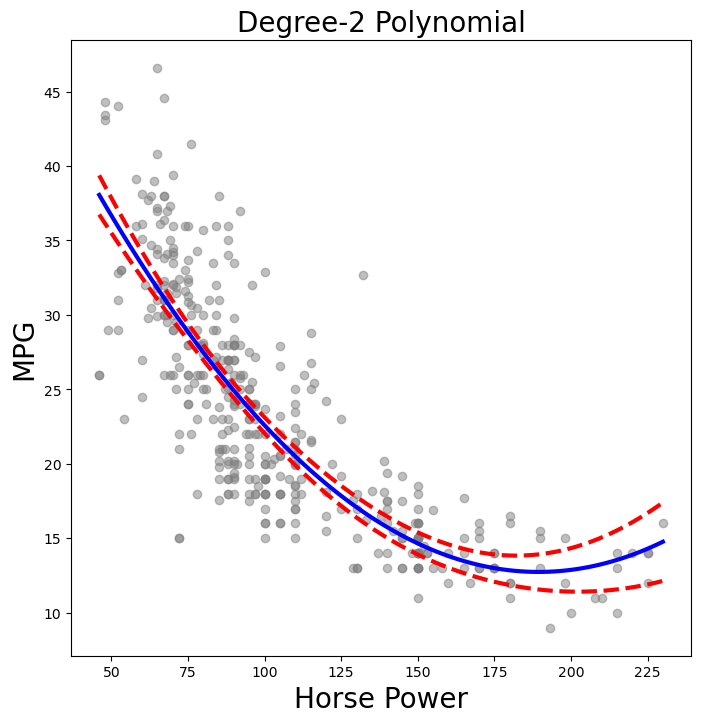

In [136]:
plot_mpg_fit(horsepower_df, 
              poly_horsepower,
              'Degree-2 Polynomial');

## Observations from the polynomial of Degree 2.

From the plot, we see that a degree 2 polynomial is a good fit for the data. This is supported by just the visual trend in the relationship which we saw in the previous pair plot.

Even though I believe the polynomial of degree 2 is a good fit, the ultimate way of knowing this is by performing statistical tests. Below, I perform a series anova test for polynomials of degrees up to 6 to get the optimal polynomial that will model this relationship. Each test compares each polynomial of degree `n` with the polynomial of degree `n-1` testing the null hypothesis that the polynomial of degree `n-1` is sufficient to explain the data against the alternative hypothesis that a more complex model of degree `n`
​
  is re.quired

In [148]:
models = [MS([poly('horsepower', degree=d)]) 
          for d in range(1, 8)]
Xs = [model.fit_transform(auto) for model in models]
anova_df = anova_lm(*[sm.OLS(y, X_).fit()
           for X_ in Xs])

anova_df

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,389.0,7442.029412,1.0,1943.886460,105.332286,4.976357e-22
2,388.0,7426.436007,1.0,15.593405,0.844951,3.585557e-01
3,387.0,7399.522632,1.0,26.913375,1.458340,2.279319e-01
4,386.0,7223.371686,1.0,176.150946,9.544993,2.150172e-03
5,385.0,7150.333505,1.0,73.038181,3.957679,4.736516e-02
6,384.0,7086.643867,1.0,63.689638,3.451115,6.397438e-02


## Interpretation of results.
When we compare `models[0] (linear)` with `model[1] (quardratic)`,  the p-value is essentially 0 meaning that the linear relationship is not sufficient to capture the relationship.

The comparison between `models[1] (quardratic)` and `models[2] (cubic)` provides a p value of 0.36 which tells us that the quardratic is a good fit for the data. Similar comparison between `models[2] (cubic)` and `models[3] (quartic)` have a p-value of 0.23 which also means a cubic is a good fit but there is no point in fitting any polynomial beyond the cubic.

Since both the **quadratic** and **cubic** polynomial models perform well, I would opt for the **quadratic** model as it offers a good balance between **accuracy and complexity, reducing the risk of overfitting while still capturing key patterns in the data**.

In [ ]:
anova_df.to_c